# About Dataset

## 📔Author : Syed Muzamil Karim
 [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=flat&logo=github)](https://github.com/mozammilkarim)\
 [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=flat&logo=kaggle)](https://www.kaggle.com/muzammlkarim)\
 [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=flat&logo=linkedin)](https://www.linkedin.com/in/mozammilkarim/)

## Metadata 📄
    Google PlayStore Android App Data. (2.3 Million+ App Data)
Dataset link : <https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps>

    The dataset contains Application data of more than 600K applications with the following 23 attributes.-

+ App Name : Name of the application

+ App Id: Unique Application Id

+ Category: Category of application to which it belongs

+ Rating : Average rating  given to the application by a user

+ Rating count : Number of rating for the application
 
+ Installs :Approximate install count

+ Minimum Installs :Approximate minimum app install count

+ Maximum Installs : Approximate maximum app install count

+ Free : Whether app is Free or Paid

+ Price: App price

+ Currency

+ Size

+ Minimum
 Android
+ Developer
 Id
+ Developer
 Website
+ Developer
 Email
+ Released

+ Privacy
 Policy
+ Last
 Updated
+ Content
 Rating
+ Ad
 Supported
+ In
 app purchases
+ Editor
 Choice

## Aim/Objectives
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the Wrangling process, we will document our observations. Ultimately, we will produce a summary and draw insights from our findings.

# Libraries Used
* numpy
* pandas
* matplotlib
* seaborn

# Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    Setting maximum display option of rows and columns to get complete picture of data

In [2]:
#set options to be maximum for rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading the dataset and getting a sneak peak 🧐

In [3]:
df=pd.read_csv("google_playstore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

    There are 23 columns in the dataset with 2312944  records having a mixture of different datatypes. 

In [4]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


    At present , total 5 numerical columns , minimum Rating for Rating column can't be zero as apps are ranked from 1 to 5 .

In [5]:
df.sample(3)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2278450,Yasel,com.yasel.yaselservices,Shopping,0.0,0.0,10+,10.0,27,True,0.00,USD,6.9M,4.2 and up,Yasel Services,NaN,salah.addou@gmail.com,"Aug 3, 2020","Aug 03, 2020",Everyone,https://sites.google.com/view/yasel/accueil,False,False,False,2021-06-16 12:28:54
2223074,1Click 2CUT: AutoCut AutoBlur Background Eraser,com.jk.click2cut.photocutbackground,Photography,3.7,66.0,"10,000+",10000.0,25853,True,0.00,USD,49M,5.0 and up,JK-Apps,https://khastech.com/app-ads.txt,toptrendinggames2016@gmail.com,"Feb 28, 2020","Jun 11, 2021",Everyone,https://sites.google.com/view/1click2cutapp/home,True,False,False,2021-06-16 11:40:44
1024122,Esini - Icon Pack,com.rainystudio.esiniiconpack,Personalization,4.1,137.0,"10,000+",10000.0,27222,False,0.99,USD,34M,4.1 and up,A1 Design,NaN,myrainy2014@gmail.com,"Apr 19, 2018","Jun 18, 2018",Everyone,NaN,False,False,False,2021-06-16 12:41:57


In [6]:
df.loc[df["Rating"]==0].sample(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1047728,SMART Attendance tools,io.shubh.productivity.smart_Attendance_tools,Tools,0.0,0.0,100+,100.0,189,True,0.0,USD,2.7M,5.0 and up,Shubhashish dangwal,NaN,Shubhashishdangwal@gmail.com,"Sep 3, 2018","Sep 03, 2018",Everyone,NaN,True,False,False,2021-06-16 13:04:36
183373,Ringhotels,com.prometteur.hotelring,Travel & Local,0.0,0.0,50+,50.0,86,True,0.0,USD,48M,5.0 and up,Ringhotels e.V.,https://www.ringhotels.de/,service@ringhotels.de,"Oct 14, 2019","Jul 07, 2020",Everyone,https://www.ringhotels.de/datenschutz,False,False,False,2021-06-15 23:26:10
1475560,Simulado Detran Campanário MG,com.a0266sag,Education,0.0,0.0,0+,0.0,0,True,0.0,USD,13M,5.0 and up,Rubens Housoft,NaN,maquinamiltop@gmail.com,"Aug 3, 2019","Nov 24, 2019",Everyone,http://rubenshousoft.blogspot.com,False,False,False,2021-06-16 00:58:17
528541,Guess The Singers of All Time,com.tomberon.guessthesingersofalltime,Trivia,0.0,0.0,100+,100.0,257,True,0.0,USD,24M,4.2 and up,tomberon,NaN,tomberon14@gmail.com,"Feb 18, 2019","Feb 19, 2019",Everyone,https://quickappninja.com/game-privacy-policy....,True,False,False,2021-06-16 05:00:50
766852,MLK365,com.phonegap.mtg.group811,Events,0.0,0.0,10+,10.0,32,True,0.0,USD,5.3M,4.0.3 and up,Map Dynamics,http://marchforthedream.org/,operations@mlk365.org,"Dec 14, 2018","Dec 14, 2018",Everyone,https://www.map-dynamics.com/w3c/privacy.html,False,False,False,2021-06-16 08:41:21


In [7]:
df.loc[df["Rating"]==0].shape

(1059762, 24)

    It means apps that are not ranked by users , meaning measing values are filled as '0' .
    We need to fill them with nan values otherwise it will lead to wrong analysis and inconsistent results

> Rating Count and Size should be a number, currently they are stored as object type.
    Installs have a lot of categories , so we need to convert it into some meaningful and fewer groups

## Finding Missing Values 🧐

In [8]:
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

> A lot of missing values are present in the dataset, even in the important columns like Rating, Size

### Now plotting some graphs to understand the level of missing values in dataset

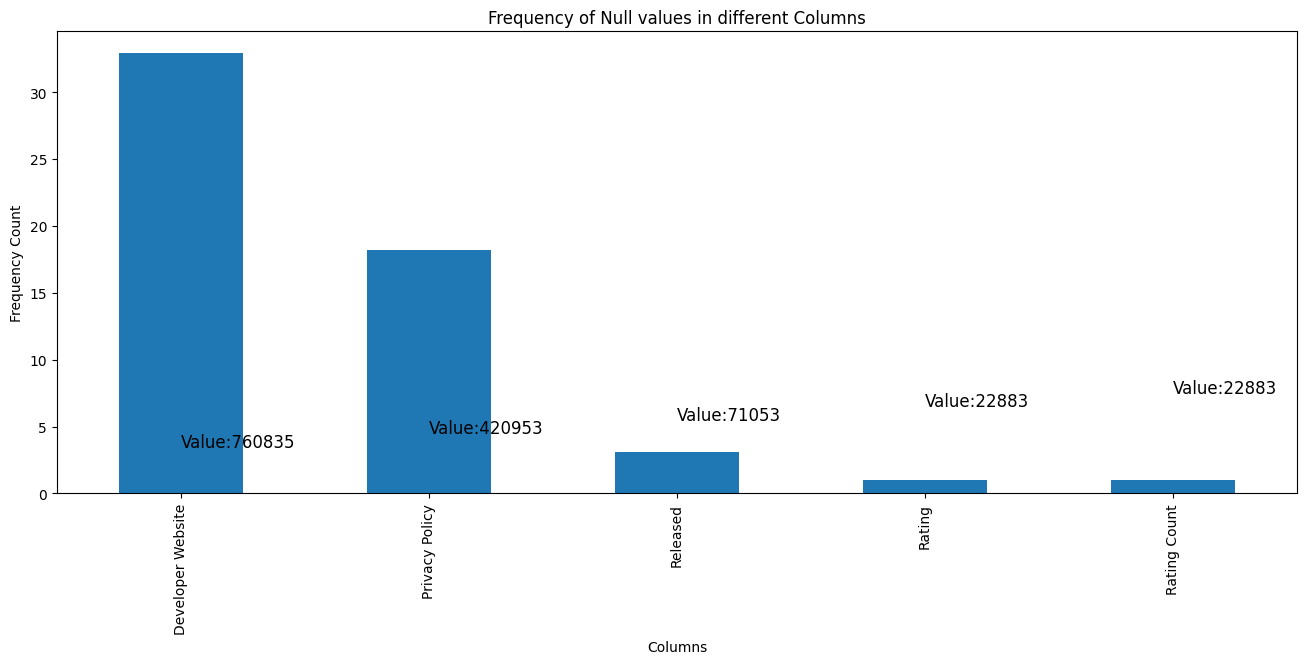

In [9]:
plt.figure(figsize=(16,6))
#plot the null values by their precentage, only if the null values are more than 0.5%
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_values=missing_values[missing_values>0.5].plot(kind='bar')
plt.text(0,3.5,"Value:760835",fontsize=12) # respective null values
plt.text(1,4.5,"Value:420953",fontsize=12)
plt.text(2,5.5,"Value:71053",fontsize=12)
plt.text(3,6.5,"Value:22883",fontsize=12)
plt.text(4,7.5,"Value:22883",fontsize=12)
plt.title("Frequency of Null values in different Columns")
plt.xlabel("Columns")
plt.ylabel("Frequency Count")
plt.show()

1) Fig. 1 shows frequency of Null values in different Columns, we will pay attention to only these columns as they have more than 0.5% of missing values in their respective columns

# Preprocessing Begins
* Now exploring some important columns and we will impute nan values later. 

In [10]:
df["Rating"].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

> Replacing '0' rated values as nan because rating of an app can't be zero , scale(1-5)

In [11]:
df["Rating"]=df["Rating"].fillna(0)
df["Rating"]=df["Rating"].apply(lambda x: np.nan if x==0 else x)

In [12]:
df["Rating"].unique()

array([nan, 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9, 1.7,
       1.6, 1. , 1.1])

## Dealing with Size column
* Changing their data type to make it more understandable

In [13]:
df["Size"].value_counts().sort_values(ascending=True)

Size
512M                      1
580M                      1
8.3k                      1
519M                      1
830M                      1
568M                      1
5.3k                      1
712M                      1
356M                      1
700M                      1
394M                      1
914M                      1
691M                      1
737M                      1
442M                      1
725M                      1
3.2k                      1
532M                      1
977M                      1
959M                      1
981M                      1
526M                      1
643M                      1
497M                      1
447M                      1
437M                      1
282M                      1
371M                      1
996M                      1
6.2k                      1
370M                      1
720M                      1
844M                      1
744M                      1
429M                      1
521M           

    convert all size data into Mbs and replace 'Varies with device' to nan values
    Assuming 'Varies with device' can be considered that way

In [14]:
df.value_counts("Size")

Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
16M                   42474
15M                   41306
17M                   37244
10M                   34114
18M                   31707
19M                   29723
21M                   29023
20M                   28796
22M                   28261
23M                   27337
24M                   25301
25M                   25023
26M                   23897
27M                   21826
28M                   21157
29M                   20050
37M                   18658
30M                   18625
31M                   18150
4.9M                  17967
32M                   17629
4.2M                  17421
3.8M                  17193
3.7M                  16927
38M                   16811
3.4M                  16752
33M                   16681
4.0M                  16481
3.5M                  16379
3.9M                  16288
3.3M           

In [15]:
def convert_data_sizes(val):
    # handling missing values
    # missing values have float type, all others are object
    if type(val)==float:
        return val
    if 'k' in val:
        return float(val.split("k")[0])/1024
    elif 'M' in val:
        return (val.split("M")[0])
    else : # for 'Varies with device' 
        return np.nan

In [16]:
# replace "," with "" in "Size"
df["Size"]=df["Size"].apply(lambda x:x.replace(",","") if "," in str(x) else x) 

In [17]:
# converting size into Mb data format, but still remain in string/object data type
df["Size"]=df["Size"].apply(convert_data_sizes)

In [18]:
df["Size"].dtype

dtype('O')

In [19]:
# nan is also of float type and size data also contains decimal values
df["Size"]=df["Size"].apply(lambda x:float(x)) 

In [20]:
df.isnull().sum().sort_values(ascending=False)

Rating               1082645
Developer Website     760835
Privacy Policy        420953
Size                   74986
Released               71053
Rating Count           22883
Minimum Android         6530
Currency                 135
Installs                 107
Minimum Installs         107
Developer Id              33
Developer Email           31
App Name                   5
App Id                     0
Price                      0
Free                       0
Maximum Installs           0
Last Updated               0
Content Rating             0
Category                   0
Ad Supported               0
In App Purchases           0
Editors Choice             0
Scraped Time               0
dtype: int64

> Dropping 5 columns as they have approximate 100 or less missing entries as shown in [fig.1](#now-plotting-some-graphs-to-understand-the-level-of-missing-values-in-dataset)

In [21]:
drop_columns=["Installs", "Minimum Installs", "Developer Id", "Developer Email","Currency"]
df.dropna(subset=drop_columns,axis=0,inplace=True)

In [22]:
df.duplicated().sum()

0

## Further Preprocessing

In [23]:
df.isnull().sum().sort_values(ascending=False)

Rating               1082498
Developer Website     760789
Privacy Policy        420898
Size                   74912
Released               70943
Rating Count           22767
Minimum Android         6530
App Name                   5
Free                       0
Price                      0
Currency                   0
Maximum Installs           0
App Id                     0
Developer Id               0
Minimum Installs           0
Developer Email            0
Installs                   0
Last Updated               0
Content Rating             0
Category                   0
Ad Supported               0
In App Purchases           0
Editors Choice             0
Scraped Time               0
dtype: int64

In [24]:
df.sample(2)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1971715,Marathi Ukhane For Male And Female - मराठी उखाणे,com.iw.marathiukhane,Books & Reference,NaN,0.0,"1,000+",1000.0,1821,True,0.0,USD,4.6,5.0 and up,IdyllicWays Limited,http://www.idyllicways.co.in/,idyllicway@gmail.com,"Nov 1, 2020","Apr 26, 2021",Everyone,http://www.idyllicways.co.in/privacypolicy.html,True,False,False,2021-06-16 08:01:33
940344,Wrapify,com.wrapify.drive,Lifestyle,2.0,1287.0,"100,000+",100000.0,161464,True,0.0,USD,16.0,5.0 and up,Wrapify,http://www.wrapify.com,info@wrapify.com,"Jul 31, 2016","May 24, 2021",Everyone,http://www.wrapify.com/privacy-policy/,False,False,False,2021-06-16 11:22:56


    Now grouping Installs into fewer groups using binning for better understanding

In [25]:
# replacing "+" in Installs with ""
df["Installs"]=df["Installs"].apply(lambda x:x.replace("+","") if "+" in str(x) else x)

In [26]:
# replacing "," in Installs with "" and converting data type to float
df["Installs"]=df["Installs"].apply(lambda x:x.replace(",","") if "," in str(x) else x)
df["Installs"]=df["Installs"].apply(lambda x:float(x))

In [27]:
# Finally binning into understandable groups
labels=["No Download",'Low','Moderate','Above Moderate','High','Top Notch']
bins=[-1,0,10,100,1000,10000,1000000]
df["Installs_category"]=pd.cut(df["Installs"],bins=bins,labels=labels)

In [28]:
df["Installs"].unique()

array([1.e+01, 5.e+03, 5.e+01, 1.e+02, 1.e+03, 5.e+02, 5.e+04, 1.e+04,
       1.e+00, 5.e+05, 1.e+05, 5.e+00, 1.e+07, 1.e+06, 5.e+06, 0.e+00,
       1.e+08, 5.e+07, 1.e+09, 5.e+08, 5.e+09, 1.e+10])

In [29]:
df["Installs_category"].unique()

['Low', 'High', 'Moderate', 'Above Moderate', 'Top Notch', NaN, 'No Download']
Categories (6, object): ['No Download' < 'Low' < 'Moderate' < 'Above Moderate' < 'High' < 'Top Notch']

### Imputing the missing values 
There are no duplicate entries in the dataset, so only imputation is left

Following columns have missing values
* Rating               ,
Developer Website     ,
Privacy Policy        ,
Size                   ,
Released               ,
Rating Count           ,
Minimum Android 

    Developer Website and Privacy Policy'S missing values can't be imputed . In addition it doesn't come handy in analysis , this is from domain knowledge 

<Axes: >

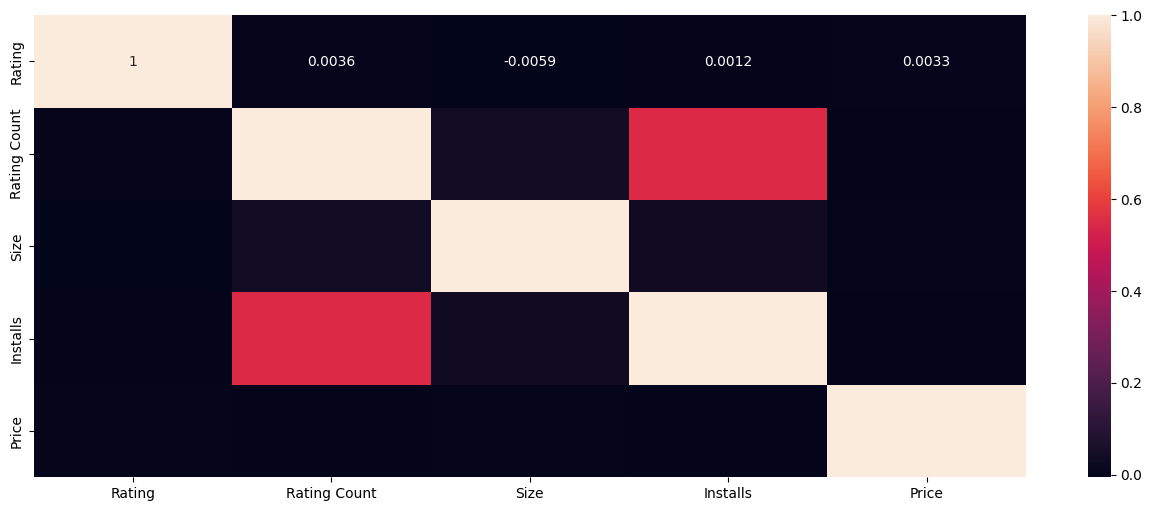

In [30]:
numeric_cols=["Rating","Rating Count","Size","Installs","Price"]
plt.figure(figsize=(16,6))
sns.heatmap(df[numeric_cols].corr(),annot=True)

In [31]:
df[["Privacy Policy","Developer Website","Released","Minimum Android"]].sample(3)

,Privacy Policy,Developer Website,Released,Minimum Android
1874595,https://aioz.com.au/pages/?page=privacy-policy...,http://www.aioz.com.au,"May 30, 2020",6.0 and up
440224,http://apptegy.com/privacy-policy,http://apptegy.com,"May 29, 2020",4.1 and up
1523353,https://www.easyorderapp.com/en/privacy-policy,NaN,"Feb 17, 2021",4.4 and up


    Imputing Released and Minimum Android column with their mode value

In [32]:
# Mode imputation for categorical columns
mode_value = df['Released'].mode()[0]  # Calculate the mode
df['Released'] = df['Released'].fillna(mode_value)

In [33]:
mode_value = df['Minimum Android'].mode()[0]  # Calculate the mode
df['Minimum Android'] = df['Minimum Android'].fillna(mode_value)

In [34]:
df[["Released","Minimum Android"]].isna().sum()

Released           0
Minimum Android    0
dtype: int64

###  Rating
* checking for Outliers and pattern in Rating column

In [35]:
df.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size
count,1.230247e+06,2.289978e+06,2.312745e+06,2.312745e+06,2.312745e+06,2.312745e+06,2.237833e+06
mean,4.100923e+00,2.864937e+03,1.834473e+05,1.834473e+05,3.202185e+05,1.035055e-01,1.920071e+01
std,6.890995e-01,2.121664e+05,1.513174e+07,1.513174e+07,2.355597e+07,2.633239e+00,2.388401e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e-03
25%,3.800000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,4.900000e+00
50%,4.200000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00,1.000000e+01
75%,4.600000e+00,4.200000e+01,5.000000e+03,5.000000e+03,7.353000e+03,0.000000e+00,2.500000e+01
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,1.020000e+03


<Axes: >

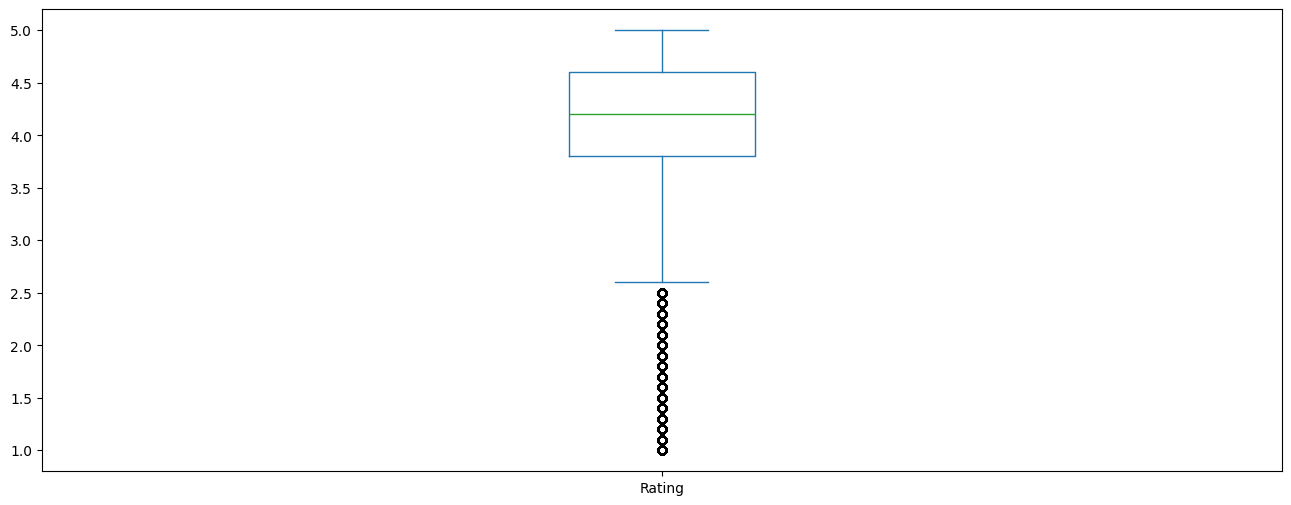

In [36]:
# Rating column has outliers and is left skewed data because upper whisker's length is less
df["Rating"].plot(kind="box",figsize=(16,6))


<Axes: >

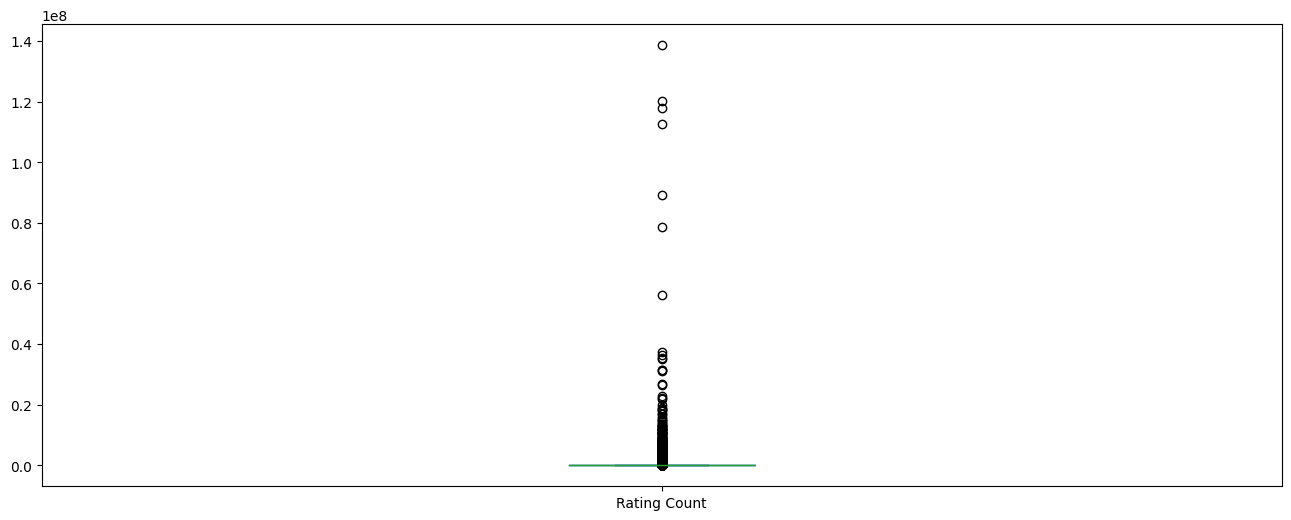

In [37]:
# Not much clear
df["Rating Count"].plot(kind="box",figsize=(16,6))

<Axes: >

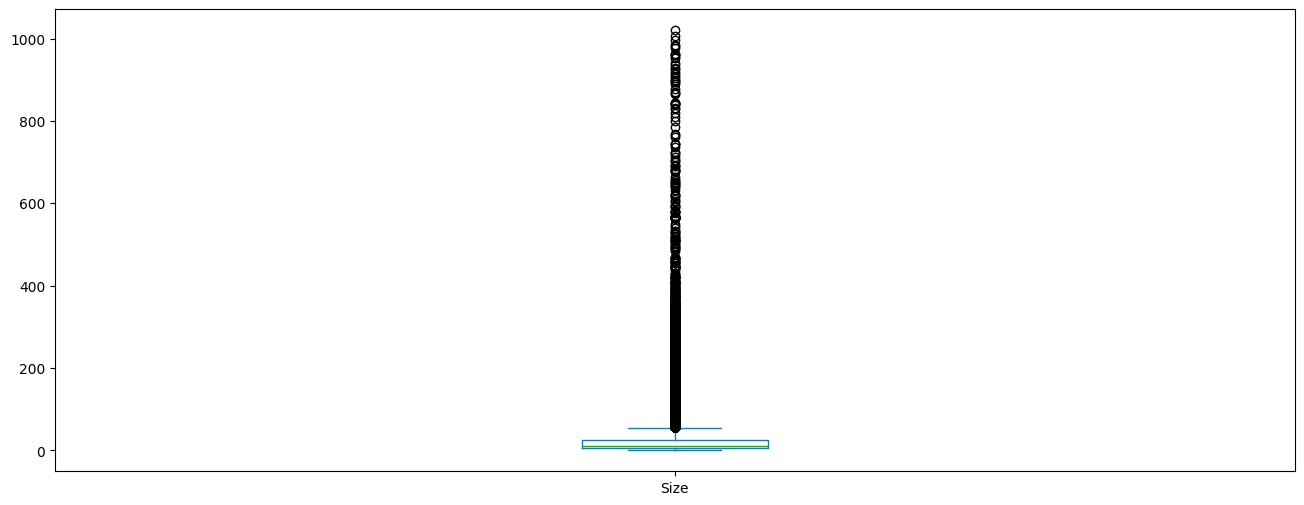

In [38]:
# Size has two many outliers
df["Size"].plot(kind="box",figsize=(16,6))

In [39]:
df["Size"].isnull().sum()

74912

> Because of presence of too many outliers, replacing null values with median

In [40]:
# df['Rating'].median()
median=df.groupby('Category')['Size'].median()
df['Size'] = df.apply(lambda row: median[row['Category']] if pd.isna(row['Size']) else row['Size'], axis=1)

Now replacing remaining missing values in categorical columns with their modes

In [41]:
# Mode imputation
mode_value = df['Category'].mode()[0]  # Calculate the mode
df['Category'] = df['Category'].fillna(mode_value)

<Axes: >

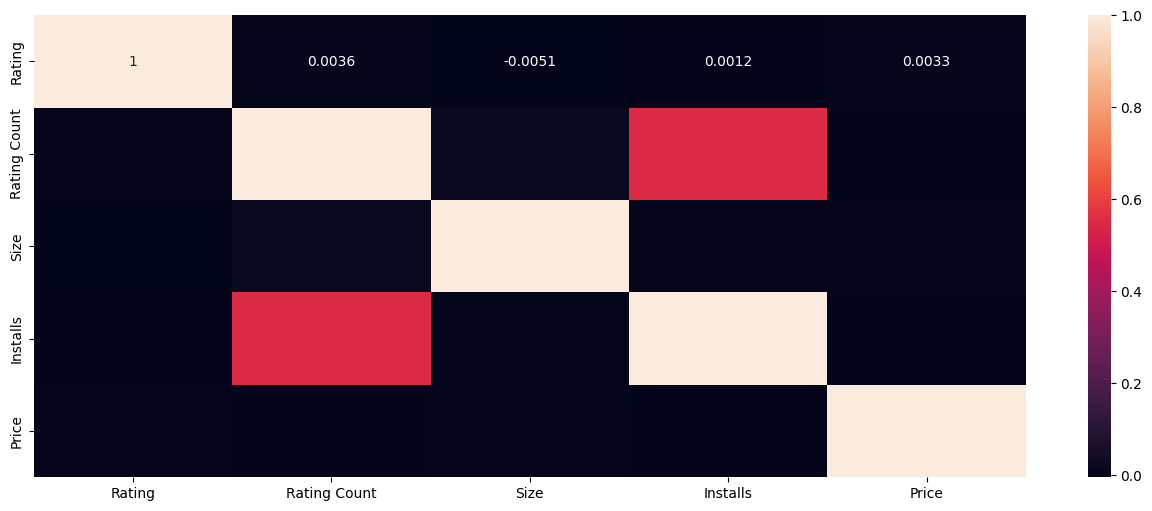

In [42]:
numeric_cols=["Rating","Rating Count","Size","Installs","Price"]
plt.figure(figsize=(16,6))
sns.heatmap(df[numeric_cols].corr(),annot=True)

### Some Observations
* Only Rating Count has some fair correlation with No. of Installs
* Each category of app has different rating , so imputing missing values as per the category of application
* Imputing with median as outliers are there in both rating columns on the basis of category

In [43]:
# df['Rating'].median()
median=df.groupby('Category')['Rating Count'].median()
df['Rating Count'] = df.apply(lambda row: median[row['Category']] if pd.isna(row['Rating Count']) else row['Rating Count'], axis=1)

In [44]:

median=df.groupby('Category')['Rating'].median()
# Impute missing values with respective category median
df['Rating'] = df.apply(lambda row: median[row['Category']] if pd.isna(row['Rating']) else row['Rating'], axis=1)

In [45]:
df[["Rating","Rating Count"]].isna().sum()

Rating          0
Rating Count    0
dtype: int64

In [46]:
df.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size
count,2.312745e+06,2.312745e+06,2.312745e+06,2.312745e+06,2.312745e+06,2.312745e+06,2.312745e+06
mean,4.162331e+00,2.836854e+03,1.834473e+05,1.834473e+05,3.202185e+05,1.035055e-01,1.902990e+01
std,5.125131e-01,2.111197e+05,1.513174e+07,1.513174e+07,2.355597e+07,2.633239e+00,2.356530e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e-03
25%,4.100000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,5.100000e+00
50%,4.200000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00,1.000000e+01
75%,4.400000e+00,4.100000e+01,5.000000e+03,5.000000e+03,7.353000e+03,0.000000e+00,2.400000e+01
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,1.020000e+03


# EDA: Exploratory Data Analysis 

### Pre Processing Completed, Now some questions to answer
    
1) Top 10 installed apps 
2) Top 5 installed apps categories for developers to target
3) Top 10 paid apps that have most installs in each category
4) Price or Price Range of top notch apps on the basis of installs
5) Is missing values in Developer Website and Privacy column affects no. of installs
6) Top 5 android versions to increase installs
7) Which month(s) is/are best to launch apps
8) Appropriate size of most installed apps
9) Are paid lower in size?
10) Does paid apps have better Rating than Free apps?
11) Does paid apps have better Rating count than Free apps?

In [47]:
df[df["Installs_category"]=='Top Notch'].sort_values(by="Installs",ascending=False).head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Installs_category
1106716,Furdiburb,com.sheado.lite.pet,Adventure,4.0,55970.0,1000000.0,1000000.0,2312399,True,0.0,USD,14.0,Varies with device,Sheado.net,http://sheado.net/pet/,pet@sheado.net,"Jun 16, 2020","Mar 14, 2015",Everyone 10+,http://www.sheado.net/about/privacy.pdf,True,True,False,2021-06-16 14:01:55,Top Notch
1881464,Crazy Sounds & Ringtones,com.blackbeltstudio.crazysounds,Music & Audio,3.5,6581.0,1000000.0,1000000.0,1333362,True,0.0,USD,17.0,4.4 and up,GoodRingtones,http://goodringtones.net/,bluewavesapps@gmail.com,"Nov 15, 2012","Dec 15, 2020",Everyone,https://www.facebook.com/notes/good-ringtones/...,True,False,False,2021-06-16 06:42:42,Top Notch
915447,Toon Math: Endless Run and Math Games,com.closeapps.mathrun,Puzzle,4.4,25098.0,1000000.0,1000000.0,4430760,True,0.0,USD,41.0,4.4 and up,MATH GAMES,http://www.toonmathgames.com/site/,contact@toonmathgames.com,"Jul 26, 2017","May 25, 2021",Everyone,http://www.toonmathgames.com/privacy-policy.html,True,True,False,2021-06-16 10:59:51,Top Notch
1317707,Hanuman Chalisa,spiritualstudio.hanumanchalisa,Social,4.8,19711.0,1000000.0,1000000.0,1795619,True,0.0,USD,11.0,4.1 and up,Spiritual Studio,https://spiritualstudio.in/,spiritualstudio.android@gmail.com,"Jun 1, 2014","May 25, 2021",Everyone,https://sites.google.com/site/spiritualstudiop...,True,False,False,2021-06-15 22:26:01,Top Notch
1881558,Smart Book - Parallel translation of books,com.kursx.smartbook,Education,4.7,13110.0,1000000.0,1000000.0,1014660,True,0.0,USD,10.0,4.1 and up,KursX,https://smart-book.net,kursxinc@gmail.com,"Oct 26, 2016","Jun 14, 2021",Everyone,http://smart-book.net/policy,True,True,False,2021-06-16 06:42:47,Top Notch
1317732,Wild Dinosaur Robot Game: Robot Car Games,com.playten.dino.robot.car.transform.robot.war...,Weather,4.7,1695.0,1000000.0,1000000.0,2247995,True,0.0,USD,68.0,5.0 and up,Play 10,http://www.play10.org/,viralgamezstudio@gmail.com,"Jun 15, 2020","Apr 02, 2021",Teen,http://www.play10.org/privacy.html,True,True,False,2021-06-15 22:26:03,Top Notch
1317742,Ocean HD Free,com.dualboot.apps.oceanfree,Personalization,4.3,32159.0,1000000.0,1000000.0,1947338,True,0.0,USD,7.8,2.3 and up,DualBoot Games,https://www.facebook.com/dualbootgames,help@dualbootgames.com,"Jun 11, 2014","Jun 13, 2014",Everyone,NaN,False,True,False,2021-06-15 22:26:03,Top Notch
394841,Phone Virtual Reality 3D Joke,ru.smileappsandgames.phonevirtualreality3djoke,Simulation,2.3,10403.0,1000000.0,1000000.0,1875322,True,0.0,USD,42.0,2.3 and up,Smile Apps And Games,NaN,smileappsandgames@gmail.com,"Dec 4, 2015","Dec 23, 2016",Teen,https://docs.google.com/document/d/1tVW0u8bE42...,True,False,False,2021-06-16 03:00:18,Top Notch
915380,Butt & Legs Workout - Buttocks Workout at Home,fityfor.me.buttlegs,Health & Fitness,4.7,75562.0,1000000.0,1000000.0,3909763,True,0.0,USD,11.0,4.4 and up,fitfit.am,http://fitfit.am,support@fitfit.am,"Feb 24, 2017","May 25, 2021",Everyone,https://docs.google.com/document/d/14iS13zYNpD...,True,True,False,2021-06-16 10:59:48,Top Notch
1881479,Fingerprint Quick Action,com.ztc1997.fingerprint2sleep,Tools,3.5,13360.0,1000000.0,1000000.0,2664736,True,0.0,USD,1.7,6.0 and up,Code boy studio,https://github.com/ztc1997/Fingerprint2Sleep,dev@ztc1997.com,"Nov 14, 2016","Jul 22, 2018",Everyone,https://www.freeprivacypolicy.com/privacy/view...,True,False,False,2021-06-16 06:42:43,Top Notch


In [48]:
df["Installs_category"].isnull().sum()

14294

In [49]:
df[df['Installs']>100000].sort_values(by="Installs",ascending=False).head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Installs_category
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,1.000000e+10,1.000000e+10,12057627016,True,0.0,USD,5.5,Varies with device,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26,NaN
893676,Google Drive,com.google.android.apps.docs,Productivity,4.3,639307.0,5.000000e+09,5.000000e+09,7028265259,True,0.0,USD,8.0,Varies with device,Google LLC,https://support.google.com/drive/?p=android_dr...,apps-help@google.com,"Apr 27, 2011","Jun 09, 2021",Everyone,http://www.google.com/policies/privacy,False,True,False,2021-06-16 10:39:49,NaN
1830962,Google Photos,com.google.android.apps.photos,Photography,4.5,35369236.0,5.000000e+09,5.000000e+09,5754179589,True,0.0,USD,12.0,Varies with device,Google LLC,https://support.google.com/photos,apps-help@google.com,"May 28, 2015","Jun 14, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 06:00:01,NaN
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,5.000000e+09,5.000000e+09,9766230924,True,0.0,USD,12.0,Varies with device,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,"Oct 20, 2010","Jun 16, 2021",Teen,http://www.google.com/policies/privacy,True,False,False,2021-06-16 10:28:37,NaN
944254,Google Chrome: Fast & Secure,com.android.chrome,Communication,4.1,31481796.0,5.000000e+09,5.000000e+09,8925640788,True,0.0,USD,8.6,Varies with device,Google LLC,http://www.google.com/chrome/android,apps-help@google.com,"Feb 7, 2012","Jun 14, 2021",Everyone,http://www.google.com/chrome/intl/en/privacy.html,False,False,False,2021-06-16 11:26:31,NaN
2099458,Gmail,com.google.android.gm,Communication,4.2,9488421.0,5.000000e+09,5.000000e+09,8756574289,True,0.0,USD,8.6,Varies with device,Google LLC,http://support.google.com/mail/bin/topic.py?hl...,apps-help@google.com,"Sep 21, 2010","Jun 16, 2021",Everyone,http://www.google.com/policies/privacy,True,False,False,2021-06-16 09:53:00,NaN
385470,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,5.000000e+09,5.000000e+09,6265637751,True,0.0,USD,8.6,Varies with device,WhatsApp LLC,http://www.whatsapp.com/,android@support.whatsapp.com,"Oct 18, 2010","Jun 09, 2021",Everyone,http://www.whatsapp.com/legal/#Privacy,False,False,True,2021-06-16 02:51:24,NaN
2011395,Android Accessibility Suite,com.google.android.marvin.talkback,Tools,4.2,2666450.0,5.000000e+09,5.000000e+09,7408134567,True,0.0,USD,5.5,Varies with device,Google LLC,https://developer.android.com/guide/topics/ui/...,apps-help@google.com,"Jun 16, 2020","May 19, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 08:36:32,NaN
2222701,Facebook,com.facebook.katana,Social,2.3,117850066.0,5.000000e+09,5.000000e+09,6782619635,True,0.0,USD,9.8,Varies with device,Facebook,https://www.facebook.com/facebook,facebook.android@fb.com,"Jun 16, 2020","Jun 16, 2021",Teen,https://www.facebook.com/about/privacy/,True,True,False,2021-06-16 11:40:20,NaN
1060335,Google Text-to-Speech,com.google.android.tts,Tools,4.1,254700.0,5.000000e+09,5.000000e+09,9034404884,True,0.0,USD,5.5,Varies with device,Google LLC,http://www.google.com/,tts-feedback@google.com,"Oct 10, 2013","Mar 29, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 13:16:56,NaN


## Observations:
* Answers to our [questions](#pre-processing-completed-now-some-questions-to-answer)

1) Obviously Google and Facebook backed apps have most installation

In [50]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

Category
Tools                      7.144032e+10
Communication              4.321659e+10
Productivity               2.831393e+10
Photography                1.899896e+10
Video Players & Editors    1.859115e+10
Name: Installs, dtype: float64

3) Top 10 paid apps that have most installs 

In [51]:
df[df["Free"]==False].groupby('Category')["Installs"].sum().sort_values(ascending=False).head(5)

Category
Action             55001308.0
Arcade             31009597.0
Tools              26174503.0
Puzzle             25579401.0
Personalization    24195492.0
Name: Installs, dtype: float64

In [52]:
# grouped_data=df[df["Free"]==False].groupby('Category')#.sum().sort_values(by='Installs',ascending=False).head(10)
# for name,group in grouped_data:
#     print(name,":\n",group.sort_values(by='Installs',ascending=False).head(2)["App Name"])

df[df["Free"]==False].sort_values(by='Installs',ascending=False).head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Installs_category
837351,Minecraft,com.mojang.minecraftpe,Arcade,4.6,4132618.0,10000000.0,10000000.0,36183322,False,7.49,USD,22.0,5.0 and up,Mojang,http://help.mojang.com,help@minecraft.net,"Aug 15, 2011","May 27, 2021",Everyone 10+,https://privacy.microsoft.com/en-us/privacysta...,False,True,True,2021-06-16 09:47:13,NaN
508696,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.4,854992.0,10000000.0,10000000.0,24958893,False,0.99,USD,48.0,4.1 and up,SQUARE ENIX LTD,http://www.square-enix.com/eng/,support@square-enix-montreal.mail.helpshift.com,"Jun 3, 2015","Aug 24, 2020",Mature 17+,http://eu.square-enix.com/en/documents/privacy...,True,True,True,2021-06-16 04:42:58,NaN
1859983,Stickman Legends-Shadow Fight Premium Offline ...,com.zitga.ninja.stickman.legends.shadow.wars,Action,4.3,235762.0,10000000.0,10000000.0,13264461,False,0.99,USD,126.0,5.0 and up,ZITGA,NaN,StickmanLegends@zitga.com.vn,"May 10, 2017","Jun 08, 2021",Everyone 10+,https://docs.google.com/document/d/1ZGlKsarN5y...,True,True,False,2021-06-16 06:24:42,NaN
2052997,League of Stickman 2020- Ninja Arena PVP(Dream...,me.dreamsky.stickman,Action,4.1,65269.0,5000000.0,5000000.0,5621942,False,0.99,USD,44.0,4.0.3 and up,DreamSky,http://www.leagueofstickman.com,leagueofstickman@dreamsky.me,"Sep 3, 2016","Dec 30, 2020",Teen,http://www.dreamsky.me/league-of-stickman-priv...,True,True,False,2021-06-16 09:12:31,NaN
6302,True Skate,com.trueaxis.trueskate,Sports,4.4,191460.0,5000000.0,5000000.0,7040478,False,1.99,USD,99.0,4.1 and up,True Axis,http://trueskate.com,support.android@trueskate.com,"Jul 19, 2013","Jun 07, 2021",Everyone,http://trueaxis.com/tsspp.html,True,True,False,2021-06-15 20:25:39,NaN
1933739,Poweramp Full Version Unlocker,com.maxmpz.audioplayer.unlock,Music & Audio,4.2,55111.0,5000000.0,5000000.0,5481771,False,4.99,USD,7.8,Varies with device,Max MP,http://powerampapp.com,poweramp.maxmpz@gmail.com,"Nov 7, 2010","Jan 20, 2020",Everyone,https://www.iubenda.com/privacy-policy/8016901...,False,False,False,2021-06-16 07:28:13,NaN
1093849,Geometry Dash,com.robtopx.geometryjump,Arcade,4.6,780332.0,1000000.0,1000000.0,4827946,False,1.99,USD,85.0,4.0 and up,RobTop Games,http://www.robtopgames.com,support@robtopgames.com,"Aug 12, 2013","Nov 15, 2017",Everyone,http://www.robtopgames.com/privacy_policy.pdf,False,False,False,2021-06-16 13:49:29,Top Notch
2076232,Mini Metro,nz.co.codepoint.minimetro,Simulation,4.6,51479.0,1000000.0,1000000.0,1683220,False,0.99,USD,40.0,Varies with device,Dinosaur Polo Club,https://dinopoloclub.com,support@dinopoloclub.com,"Oct 17, 2016","Apr 20, 2021",Everyone,https://dinopoloclub.com/games/mini-metro/priv...,False,False,False,2021-06-16 09:32:43,Top Notch
1304647,Peppa Pig: Sports Day,com.peppapig.sportsday,Educational,3.9,4675.0,1000000.0,1000000.0,1629508,False,2.99,USD,81.0,5.0 and up,Entertainment One,http://eonefamily.com/home,support@peppapig.com,"Jul 20, 2016","Nov 04, 2019",Everyone,http://www.peppapig.com/grown-ups/privacy-policy,False,False,False,2021-06-15 22:14:40,Top Notch
402856,Worms 2: Armageddon,com.worms2armageddon.app,Strategy,3.7,62235.0,1000000.0,1000000.0,1218957,False,5.49,USD,9.4,4.1 and up,Team 17 Digital Limited,http://www.team17.com,help@team17support.com,"Apr 4, 2013","Apr 01, 2021",Everyone,http://www.team17.com/privacy-policy,False,False,False,2021-06-16 03:07:45,Top Notch


> tools and entertainment based apps are best paid categories

4) Price or Price Range of top notch apps on the basis of installs

In [53]:
df[df["Installs"]>100000]["Price"].value_counts().sort_values(ascending=False).head(5)

Price
0.00    74713
0.99       71
4.99       35
2.99       32
1.99       22
Name: count, dtype: int64

In [54]:
df[df["Installs"]>100000]["Price"].unique()

array([ 0.      ,  3.99    ,  1.99    ,  2.99    ,  0.99    ,  6.99    ,
        3.5     ,  4.99    ,  5.99    ,  5.49    ,  1.49    ,  8.49    ,
       14.99    ,  4.49    , 19.99    ,  3.49    ,  2.49    ,  8.99    ,
        7.49    ,  9.99    ,  2.      ,  3.85    ,  7.99    ,  3.      ,
       15.99    , 16.99    ,  5.077773,  4.95    ,  1.09    ,  3.69    ,
        3.3     , 13.99    ,  3.75    ])

> Mostly Top Notch apps are free but if they are paid, their price should be ideally less than $5

5) Is missing values in Developer Website  affects no. of installs

In [55]:
without_web_top_notch_apps =df[(df["Installs"]>=100000)&(df["Developer Website"].isnull())]["Installs"].sum()

In [56]:
total_top_notch_apps = df[(df["Installs"]>=100000)]["Installs"].sum()

In [57]:
print("Percentage of top notch apps without developer website:\n",(without_web_top_notch_apps/total_top_notch_apps)*100)

Percentage of top notch apps without developer website:
 9.40246960987844


> 9.4% is very less , so it means Developer website is very important to build trust among the users


6) Top 5 android versions to increase installs

In [58]:
df.groupby("Minimum Android")["Installs"].sum().sort_values(ascending=False).head(5)


Minimum Android
Varies with device    1.544757e+11
4.4 and up            6.859158e+10
5.0 and up            6.250931e+10
4.1 and up            6.121253e+10
6.0 and up            1.606230e+10
Name: Installs, dtype: float64

>Developers should target Android Version 4.1 and above

7) Which month(s) is/are best to launch apps
    * will do after time series analysis


8) Appropriate size of most installed apps

In [59]:
df.groupby("Size")["Installs"].sum().sort_values(ascending=False).head(7)

Size
5.5     4.421238e+10
8.6     3.891488e+10
12.0    3.435561e+10
8.0     1.817938e+10
9.8     1.295210e+10
7.8     6.233711e+09
8.3     6.156006e+09
Name: Installs, dtype: float64

>Ideal size of an android app should have 12Mb or less to get maximum installs

9) Are paid apps lower in size?

In [60]:
df[(df["Installs"]>10000)].groupby("Free")["Installs"].sum().sort_values(ascending=False)

Free
True     4.200938e+11
False    3.388500e+08
Name: Installs, dtype: float64

> This question can not be answered for the whole dataset as it is highly skewed towards free apps
### But asking this question for top notch installed apps is relevant
     As the difference is not too huge 

In [61]:
df[(df["Free"]==False)&(df["Installs"]>10000)]["Size"].sum()/df[(df["Free"]==True)&(df["Installs"]>10000)]["Size"].sum()

0.009706966095852683

> So probably Free apps have more size in comparison to Paid apps

In [62]:
df.sample(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Installs_category
1128874,Câmara Municipal de Santa Ernestina,com.cmsantaernestina.app,Business,4.2,0.0,1.0,1.0,3,True,0.0,USD,2.4,5.1 and up,WEBLINE SISTEMAS,http://www.weblinesistemas.com,webline@weblinesistemas.com,"Mar 22, 2021","Mar 22, 2021",Everyone,NaN,False,False,False,2021-06-16 14:23:36,Low
2260484,Best Album Boyzone Mp3 Offline | Dazkha Studio,com.dazkhastudio.mp3boyzone,Music & Audio,4.9,24.0,1000.0,1000.0,3834,True,0.0,USD,47.0,5.0 and up,dazkha studio,https://k4c34f936.app-ads-txt.com,dazkhastudio@gmail.com,"Nov 25, 2019","Feb 08, 2021",Everyone,https://kioslampung.blogspot.com/2019/09/priva...,True,False,False,2021-06-16 12:13:10,Above Moderate
1801036,Break Wall 8bit,air.BreakWall8bit,Casual,4.2,0.0,10.0,10.0,14,True,0.0,USD,12.0,4.0 and up,Asylum Bound Games LLC,http://geeknfreak.com,Thorns.matthew@gmail.com,"Mar 30, 2018","Mar 31, 2018",Everyone,http://www.geeknfreak.com/downloads/PrivacyPol...,False,False,False,2021-06-16 05:34:56,Low
1817757,Chess Tactics in Sicilian Defense 1,com.chessking.android.learn.sicilian1,Board,4.4,627.0,50000.0,50000.0,90747,True,0.0,USD,12.0,4.1 and up,Chess King,https://learn.chessking.com,android-support@chessking.com,"Nov 30, 2016","Apr 23, 2021",Everyone,https://chessking.com/android_privacy_policy.html,True,True,False,2021-06-16 05:48:53,Top Notch
1583925,একাকীত্ব স্ট্যাটাস,com.suddho_app_lab.koster_status_bangla,Lifestyle,5.0,12.0,1000.0,1000.0,4167,True,0.0,USD,6.1,5.0 and up,Suddho App Lab,NaN,suddhoyakin@gmail.com,"Oct 26, 2020","Feb 18, 2021",Everyone,https://subbhoapplab.blogspot.com/2020/10/blog...,True,False,False,2021-06-16 02:34:46,Above Moderate


10) Does paid apps have better Rating than Free apps?

In [63]:
df.groupby("Free")["Rating"].sum().sort_values(ascending=False)

Free
True     9438239.9
False     188170.5
Name: Rating, dtype: float64

In [64]:
df[(df["Installs"]>10000)].groupby("Free")["Rating"].sum().sort_values(ascending=False)

Free
True     1029988.9
False       8001.8
Name: Rating, dtype: float64

11) Which content rating is based to target?

In [65]:
df.groupby("Content Rating")["Installs"].sum().sort_values(ascending=False)

Content Rating
Everyone           3.141834e+11
Teen               8.048075e+10
Everyone 10+       1.695609e+10
Mature 17+         1.262586e+10
Adults only 18+    1.723634e+07
Unrated            3.392726e+06
Name: Installs, dtype: float64

> So , indeed even most installed Free apps are not that much rated by user
> It is obvious because paid users want to give reviews for improvement

# Summary
1) Top 10 installed apps 
    * Google and facebook based apps
2) Top 5 installed apps categories for developers to target
    * Entertainment and tools 
3) Top 10 paid apps that have most installs in each category
    * These are Action based games
4) Price or Price Range of top notch apps on the basis of installs
    * Ideally Free or less than $5
5) Is missing values in Developer Website and Privacy column affects no. of installs
    * Certainly, it develops trust with the user
6) Top 5 android versions to increase installs
    * Android version 4.1 and all above versions
7) Which month(s) is/are best to launch apps
    * Need to be done through time series analysis
8) Appropriate size of most installed apps
    * Less than 12Mb
9) Are paid lower in size?
    * Can't say with certainity but looks to be true
10) Does paid apps have better Rating than Free apps?
    * Ceratinly because users want to improve the features and performance of their app
11) Which content rating is based to target?
    * Everyone and Teens are best two content rating for installs

# Overall
 For an app to get more installs, it should be have less than 12Mb size, based in the entertainment or tool category, it's price should be ideally free or less than $5 with atleast android version 4.1 . Additionally developer website must be given .